# Data Gathering

In [1]:
#importing of libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#loading of the data
data = pd.read_csv('spam.csv',encoding='latin-1')


data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1) #dropping of the columns
data = data.rename(columns={"v1":'label', "v2":'text'}) #renaming the name of the columns
print(data.head())
tags = data["label"]
texts = data["text"]

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### To do: develop an accurate simple neural network model for spam classification (no LSTM, CNN, etc.)

# Data Preparation

### Cleaning of Data


In [2]:
data.describe() #show the description of the data

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [3]:
data.isnull().sum() #used to check if there are empty or null in the data

label    0
text     0
dtype: int64

In [4]:
dupli = data[data.duplicated()] #checking if there are duplicates in the data
print(dupli)

     label                                               text
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


In [5]:
data.drop_duplicates(inplace = True) #dropping of the duplicates in the data
data #to check the cleaned data as well as its dimension

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Preprocessing


In [6]:
#sorting the text into their respective label
ham = data[data.label =='ham'] #storing of ham messages
spam =data[data.label =="spam"] #storing of spam messages
print(ham) # to check the ham label data as well as the dimension
print(spam) # to check the spam label data and its dimension

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
6      ham  Even my brother is not like to speak with me. ...
...    ...                                                ...
5565   ham                                       Huh y lei...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[4516 rows x 2 columns]
     label                                               text
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network cust

In [7]:
#turning the text in the respective label into a numpy array for the word cloud
ham_txt = " ".join(ham.text.to_numpy().tolist()) 
spam_txt = " ".join(spam.text.to_numpy().tolist())

### Visualization

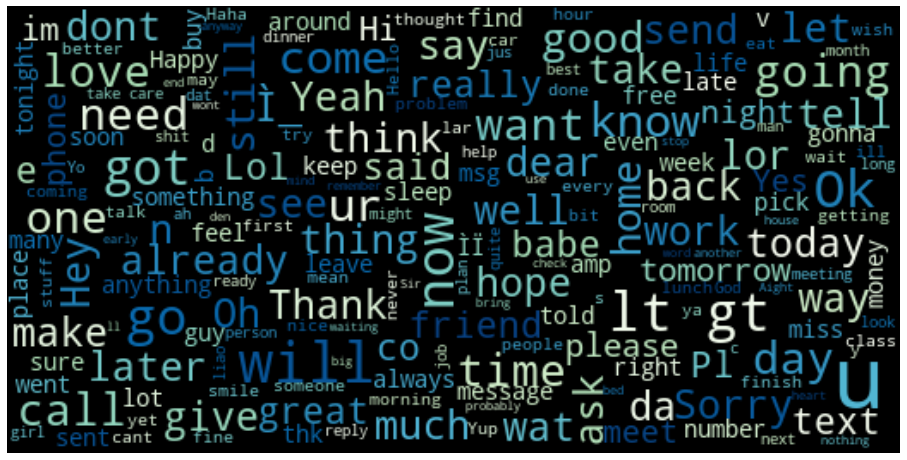

In [8]:
#visualizing ham messages frequently used words through word cloud

from wordcloud import WordCloud, STOPWORDS #importing of library used for generating word cloud
import matplotlib.pyplot as plt

# generating the word cloud for ham messages
stop=STOPWORDS
ham_txt_cloud = WordCloud(width =520, height =260, stopwords=stop,max_font_size=50, background_color ="Black" , colormap = 'GnBu').generate(ham_txt)
plt.figure(figsize=(16,10))
plt.imshow(ham_txt_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

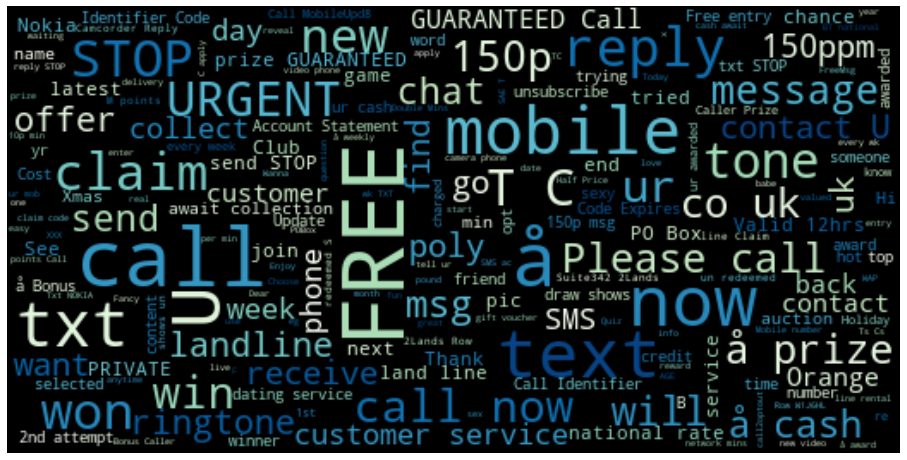

In [9]:
# generating word cloud for spam messages
spam_txt_cloud = WordCloud(width =520, height =260, stopwords=stop,max_font_size=50, background_color ="Black" , colormap = 'GnBu').generate(spam_txt)
plt.figure(figsize=(16,10))
plt.imshow(spam_txt_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

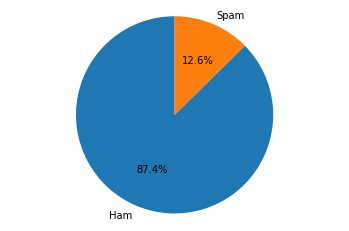

In [10]:
# pie chart for the ham and spam distribution
plt.pie([len(ham),len(spam)], labels=['Ham', 'Spam'],
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

In [11]:
# During sorting of the label, we can see that the dimension specifically the rows of the two label is not equal or balance
# this is also seen in the pie chart above which shows the distribution of the labels
# We will perform downsampling so ham and spam will match each other's dimension
ham_data = ham.sample(n = len(spam), random_state = 0) #take samples in the ham message equal to the length of the spam messsages
spam_data = spam
print(ham_data.shape, spam_data.shape) #checking if the dimension will be the same

(653, 2) (653, 2)


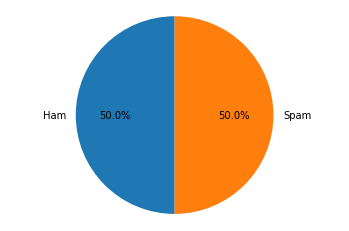

In [12]:
# pie chart for the ham and spam distribution after the downsampling
plt.pie([len(ham_data),len(spam_data)], labels=['Ham', 'Spam'],
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

In [13]:
# Combine ham and spam for the training set
df = ham_data.append(spam_data).reset_index(drop=True) #combining of the ham and spam label and text
df # checking of the combined data

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_1352\311330156.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = ham_data.append(spam_data).reset_index(drop=True) #combining of the ham and spam label and text


,label,text
0,ham,"Yup, leaving right now, be back soon"
1,ham,Hello. Sort of out in town already. That . So ...
2,ham,I fetch yun or u fetch?
3,ham,I dont know ask to my brother. Nothing problem...
4,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...
...,...,...
1301,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1302,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1303,spam,Had your contract mobile 11 Mnths? Latest Moto...
1304,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
#Converting label to numerical data
df.loc[:,'label']=df.label.map({'ham':0, 'spam': 1}) # converting ham as 0 and spam as 1
labelling = df['label'].values

In [15]:
#Splitting the test set and train set
from sklearn.model_selection import train_test_split #importing of the splitting of data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(df['text'], labelling, test_size=0.2, random_state=100) # 80% training and 20% test, the texts variable data will be put into x variables and the tags variable data will be put into y variables

In [16]:
#Converting text to numerical data 
from tensorflow.keras.preprocessing.text import Tokenizer #importing tokenizer for substituting text(string) into tokens
from tensorflow.keras.preprocessing.sequence import pad_sequences #library used to format the string
#this converts the words into individual tokens and stored in an index
tokenizer = Tokenizer(num_words=500, char_level=False, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
#getting of the converted numerical data
index = tokenizer.word_index
index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'is': 10,
 'for': 11,
 'now': 12,
 '2': 13,
 'and': 14,
 'free': 15,
 'or': 16,
 'have': 17,
 'in': 18,
 'on': 19,
 'from': 20,
 'ur': 21,
 'txt': 22,
 'with': 23,
 'me': 24,
 'of': 25,
 'this': 26,
 '4': 27,
 'are': 28,
 'text': 29,
 'mobile': 30,
 'stop': 31,
 'get': 32,
 'just': 33,
 'it': 34,
 'reply': 35,
 'my': 36,
 'our': 37,
 'at': 38,
 'no': 39,
 'claim': 40,
 'do': 41,
 'can': 42,
 'will': 43,
 'we': 44,
 'only': 45,
 'prize': 46,
 'www': 47,
 'if': 48,
 'that': 49,
 'send': 50,
 'be': 51,
 'out': 52,
 'so': 53,
 'not': 54,
 'new': 55,
 'up': 56,
 'cash': 57,
 'go': 58,
 '150p': 59,
 'uk': 60,
 'msg': 61,
 'all': 62,
 't': 63,
 'won': 64,
 'nokia': 65,
 'want': 66,
 'urgent': 67,
 '1': 68,
 "i'm": 69,
 'week': 70,
 'but': 71,
 'please': 72,
 'win': 73,
 'by': 74,
 'service': 75,
 'know': 76,
 'contact': 77,
 'good': 78,
 'when': 79,
 'phone': 80,
 'who': 81,
 'min': 82,
 'then': 8

In [17]:
#Making each sequence's length to be the same, from its token and paddings to sequence
#For training
trs = tokenizer.texts_to_sequences(x_train)
trp = pad_sequences(trs, maxlen=50, padding="post", truncating="post")
#For testing
tes = tokenizer.texts_to_sequences(x_test)
tep = pad_sequences(tes, maxlen=50,padding="post", truncating="post")

print(trp.shape)
print(tep.shape)

(1044, 50)
(262, 50)


# Choosing a Model

In [18]:
#Defining of the model
from tensorflow.keras.models import Sequential #importing library where the model(Sequential) can be found.
from tensorflow.keras.layers import Flatten, Dense, Embedding, GlobalAveragePooling1D, Activation, Dropout 
#this is the model of the neural network starting from the input layer upto the output layer
model = Sequential() #model to be used is sequential(an MLP can be instantiated as a Sequential model) 
model.add(Embedding(500, 16, input_length=50)) #adding an embedding layer which has the number of distinct words, the size of the embedding vectors, size of each input sequence, and the weight of the embedding layer which is (500,16)
model.add(GlobalAveragePooling1D()) 
model.add(Dense(56, activation="relu")) # layer with 128 neurons with relu as its activation
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid")) # layer with 1 neuron with sigmoid function as its activation

# Training

In [19]:
#Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # specifies the binary_crossentropy as the loss function, the adam optimizer, and the accuracy as the metric to be monitored

#Fitting of the model
model.fit(trp, y_train, epochs=25, validation_data=(tep, y_test)) ## train the model by iterating the entire dataset for 25 times (epochs)

Epoch 1/25
33/33 [==============================] - 1s 5ms/step - loss: 0.6881 - accuracy: 0.6456 - val_loss: 0.6807 - val_accuracy: 0.8244
Epoch 2/25
33/33 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.8352 - val_loss: 0.6431 - val_accuracy: 0.8282
Epoch 3/25
33/33 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.8649 - val_loss: 0.5621 - val_accuracy: 0.8359
Epoch 4/25
33/33 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8764 - val_loss: 0.4585 - val_accuracy: 0.8473
Epoch 5/25
33/33 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8879 - val_loss: 0.3635 - val_accuracy: 0.8664
Epoch 6/25
33/33 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.9080 - val_loss: 0.2913 - val_accuracy: 0.8893
Epoch 7/25
33/33 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9272 - val_loss: 0.2441 - val_accuracy: 0.9084
Epoch 8/25
33/33 [==

In [20]:
prediction = model.predict(tep)
pred = np.round(prediction)
print(pred)

9/9 [==============================] - 0s 750us/step
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]

# Evaluation

In [21]:
# Evaluating the model through accuracy using the tep (testing pad) data and y_test
model.evaluate(pred, y_test) #accuracy: 0.9695 , loss: 0.1404

9/9 [==============================] - 0s 875us/step - loss: 0.1404 - accuracy: 0.9695


[0.14039558172225952, 0.9694656729698181]

# Testing

In [22]:
# Loading of the test data for predicting
dt = pd.read_csv('output_spam.csv')
dt

,Unnamed: 0,text
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...
5,6,Hey we can go jazz power yoga hip hop kb and y...
6,7,Hey mate. Spoke to the mag people. We‰Û÷re on....
7,8,Morning only i can ok.
8,9,Wat time Ì_ finish?
9,10,Shant disturb u anymore... Jia you...


In [23]:
dt = dt.rename(columns={"Unnamed: 0":'label'})
lab = dt["label"]
dt

,label,text
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...
5,6,Hey we can go jazz power yoga hip hop kb and y...
6,7,Hey mate. Spoke to the mag people. We‰Û÷re on....
7,8,Morning only i can ok.
8,9,Wat time Ì_ finish?
9,10,Shant disturb u anymore... Jia you...


In [24]:
def predict(message):
    test_s = tokenizer.texts_to_sequences(message)
    test_p = pad_sequences(test_s, maxlen =50, padding = "post", truncating="post")
    return (model.predict(test_p))

In [25]:
result = predict(dt["text"])
r_result = np.round(result)
r_result = r_result.astype(int)
print (r_result)

1/1 [==============================] - 0s 12ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [26]:
#storing of the prediction data into the label column
dt['label'] = r_result
dt

,label,text
0,0,Feel Yourself That You Are Always Happy.. Slow...
1,0,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,0,Send me yetty's number pls.
3,0,Hey so this sat are we going for the intro pil...
4,0,I got it before the new year cos yetunde said ...
5,0,Hey we can go jazz power yoga hip hop kb and y...
6,0,Hey mate. Spoke to the mag people. We‰Û÷re on....
7,0,Morning only i can ok.
8,0,Wat time Ì_ finish?
9,0,Shant disturb u anymore... Jia you...


In [27]:
#Converting the numerical data into categorical data, 0 = ham and  1 = spam
dt['label'] = dt['label'].map({0: "ham", 1: "spam"})
dt

,label,text
0,ham,Feel Yourself That You Are Always Happy.. Slow...
1,ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,ham,Send me yetty's number pls.
3,ham,Hey so this sat are we going for the intro pil...
4,ham,I got it before the new year cos yetunde said ...
5,ham,Hey we can go jazz power yoga hip hop kb and y...
6,ham,Hey mate. Spoke to the mag people. We‰Û÷re on....
7,ham,Morning only i can ok.
8,ham,Wat time Ì_ finish?
9,ham,Shant disturb u anymore... Jia you...
